In [1]:
import xarray as xr
import metpy
import cartopy.crs as ccrs
from pyresample import geometry, grid
import numpy as np
import matplotlib.pyplot as plt

/sharedData2/nshakoor/.conda/envs/fires/lib/python3.7/site-packages/pyresample/bilinear/__init__.py:50: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [2]:
file = xr.open_dataset('../../GOES_Files/test_files/OR_ABI-L1b-RadC-M6C03_G17_s20210061801177_e20210061803550_c20210061803594.nc')
dat = file.metpy.parse_cf('Rad')
geos = dat.metpy.cartopy_crs
rad = dat.data

goes_params = geos.proj4_params

pc = ccrs.PlateCarree()
pc_extents = [-124.25, -114.25, 32.25, 42.25]
pc_params = pc.proj4_params

target_rows = 500
target_cols = 500
shape = [target_rows, target_cols]

target_extents = [pc_extents[0],
                    pc_extents[2],
                    pc_extents[1],
                    pc_extents[3]]

In [3]:
source_area = geometry.AreaDefinition.from_cf(file)
target_area = geometry.AreaDefinition.from_extent('CA', pc_params, shape, target_extents)

/sharedData2/nshakoor/.conda/envs/fires/lib/python3.7/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/sharedData2/nshakoor/.conda/envs/fires/lib/python3.7/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


In [4]:
result = grid.get_resampled_image(target_area, source_area, rad)
result = np.clip(result, 0, 100)
np.save('../../GOES_Files/test_files/test', result)
file.close()

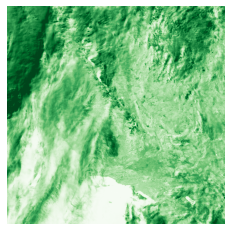

In [5]:
img_array = np.load("../../GOES_Files/test_files/test.npy")
img_array = np.clip(img_array, 0, 100)
plt.imshow(img_array, aspect='equal', cmap='Greens')
plt.axis('off')
plt.show()